<a href="https://colab.research.google.com/github/visiont3lab/deep-learning-course/blob/main/colab/TransferLearningNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes Class Transfer Learnning

## Example on how to customize alexnet

In [ ]:
import torchvision.models as models
import torch

# Pretrained model
net = models.alexnet(pretrained=True)
#print(net)

# Fix weight and bias
for name, param in net.named_parameters():
  param.requires_grad = False # disable gradient update

class FinalLayer(torch.nn.Module):
  def __init__(self,in_features, out_features):
    super(FinalLayer, self).__init__()
    self.fc1 = torch.nn.Linear(in_features,512)
    self.d = torch.nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(512,out_features)
  def forward(self, x):
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.d(x)
    x = self.fc2(x)
    return x

# Modify last layer as you want
#net.classifier = FinalLayer(9216,2) 
net.calssifier = torch.nn.Linear(in_features=9216,out_features=2, bias=True) # Weight bias completamente randomici
#print(net)

print(net)
for name, param in net.named_parameters():
#  if (name!="classifier.6.weight" and name!="classifier.6.bias" ):
#    param.requires_grad = False
  print(name, param.requires_grad)

## Example on how custumazie pretraiend model resenet18

In [ ]:
import torchvision.models as models
import torch

# Pretrained model
net = models.resnet18(pretrained=False)
print(net)

# Fix weight and bias
for name, param in net.named_parameters():
  if("bn" not in name):
    param.requires_grad = False # disable gradient update

# Modify last layer as you want
net.fc = torch.nn.Linear(in_features=512,out_features=2, bias=True) # Weight bias completamente randomici
#print(net)

print(net)
for name, param in net.named_parameters():
#  if (name!="classifier.6.weight" and name!="classifier.6.bias" ):
#    param.requires_grad = False
  print(name, param.requires_grad)

## How to use a pretrained model

* [Torchivision Model](https://pytorch.org/vision/stable/models.html)
* [Torchhub resnet](https://pytorch.org/hub/pytorch_vision_resnet/)
* [Torchhub alexnet](https://pytorch.org/hub/pytorch_vision_alexnet/)



torch.Size([1, 3, 224, 224])


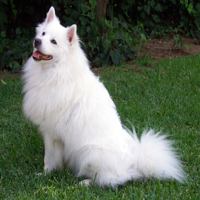

In [8]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

from PIL import Image
import cv2
from torchvision import transforms
im = cv2.imread("dog.jpg",cv2.IMREAD_COLOR) # BGR
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.ToTensor(), # 0-1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
#im_pil = transforms.ToPILImage()(im)
#im_pil = transforms.Resize((224,224))(im_pil)
#im_t = transforms.ToTensor()(im_pil) # 0-255 --> 0-1

# 1 3 224 224

im_t = tf(im).unsqueeze(0)
print(im_t.shape)
# im_pil = Image.open("dog.jpg")
display(transforms.ToPILImage()(im).resize((200,200)))

In [ ]:
#Get model IMAGENET classes
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [12]:
import torchvision.models as models

# Pretrained model
net = models.resnet18(pretrained=True)

# device
net.cpu()

# Settare la rete in evaluation mode
net.eval()

# Feedforward
with torch.no_grad():
  # Feed forward
  y_hat = net(im_t)
  # Trova le probabilità
  prob = torch.softmax(y_hat, dim=-1)
  idxs = torch.argsort(prob,descending=True)
  #print(idxs[0,0:5])
  for i in range(0,5):
    print(prob[0,idxs[0,i]], idxs[0,i]+1)
  #print(idxs.shape)
  #idx = torch.argmax(prob)
  #print(idx, prob[0,idx])

tensor(0.8372) tensor(259)
tensor(0.0610) tensor(271)
tensor(0.0390) tensor(262)
tensor(0.0233) tensor(260)
tensor(0.0130) tensor(280)
